In [47]:
import pandas as pd 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [48]:
data = pd.read_csv('F:\\new\\archive (4)\\sentiment_tweets3.csv')

In [49]:
data.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [50]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   3
Count of rows in the data is:   10314


In [51]:
data.shape

(10314, 3)

In [54]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
import string 
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    
    # Remove single numeric terms in the tweet
    tweet = re.sub(r'[0-9]', '', tweet)
    
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    # Stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
     # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    # Import stopwords and punctuation
    stopwords_english = stopwords.words('english')
    punctuation = string.punctuation
    
    # Remove stopwords and punctuation, and apply stemming
    stemmer = PorterStemmer()
    tweets_clean = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords_english and word not in punctuation]
    # Lowercasing
    normalized_tweet = [word.lower() for word in lemmatized_tokens]
    # Join tokens back into a string
    clean_tweet = " ".join(normalized_tweet)
    return clean_tweet

In [55]:
def clean_tweets_dataframe(df, tweet_column, new_column_name='cleaned_tweet'):
    df[new_column_name] = df[tweet_column].apply(clean_tweet)
    return df

# Example usage:
# Assuming you have a DataFrame called 'tweets_df' with a column 'tweet_text' containing the tweets
# This will add a new column called 'cleaned_tweet' with the cleaned tweets
cleaned_tweets_df = clean_tweets_dataframe(data, 'message to examine', 'cleaned_tweet')

In [56]:
cleaned_tweets_df.head()

,Index,message to examine,label (depression result),cleaned_tweet
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em account tomorrow oddli was...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspacecomlookthund


In [62]:
cleaned_tweets_df['message to examine'] = cleaned_tweets_df['message to examine'].apply(lambda x: re.sub(r'@mention', '', x))

In [63]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
cleaned_tweets_df['tokens'] = cleaned_tweets_df['message to examine'].apply(tknzr.tokenize)

In [64]:
cleaned_tweets_df

,Index,message to examine,label (depression result),cleaned_tweet,tokens
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,"[just, had, a, real, good, moment, ., i, misss..."
1,217,is reading manga http://plurk.com/p/mzp1e,0,read manga,"[is, reading, manga, http://plurk.com/p/mzp1e]"
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,"[@comeagainjen, http://twitpic.com/2y2lx, -, h..."
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em account tomorrow oddli was...,"[@lapcat, Need, to, send, ', em, to, my, accou..."
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspacecomlookthund,"[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo..."
...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,depress g herbo mood im done stress peopl dont...,"[No, Depression, by, G, Herbo, is, my, mood, f..."
10310,802310,What do you do when depression succumbs the br...,1,depress succumb brain make feel like youll nev...,"[What, do, you, do, when, depression, succumbs..."
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamin nasal spray show promis depress suicid...,"[Ketamine, Nasal, Spray, Shows, Promise, Again..."
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistak bad day depress everyon em,"[dont, mistake, a, bad, day, with, depression,..."


In [57]:
print(cleaned_tweets_df)

        Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   
10313  802313                                                  0   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4  

In [58]:
data['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

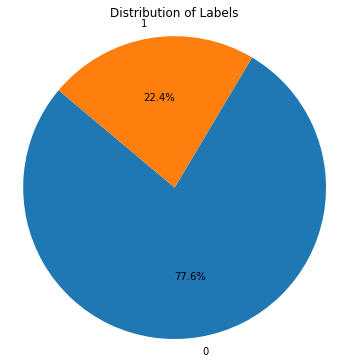

In [59]:
# Group by label and count occurrences
label_counts = cleaned_tweets_df['label (depression result)'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

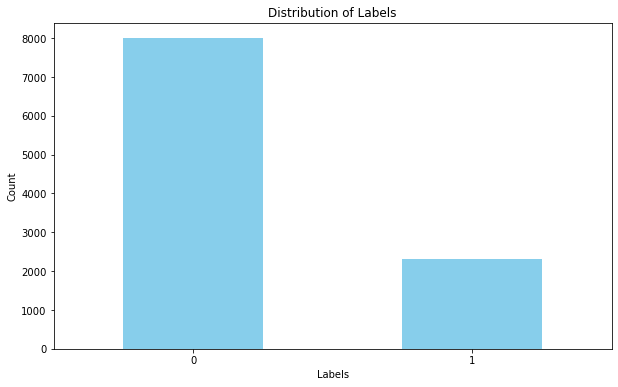

In [60]:
# Plot bar plot
plt.figure(figsize=(10, 6))
cleaned_tweets_df['label (depression result)'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [65]:
from collections import Counter
cnt = Counter()
for text in cleaned_tweets_df['message to examine'] .values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 3749),
 ('the', 3453),
 ('a', 2962),
 ('I', 2828),
 ('and', 2580),
 ('you', 1894),
 ('of', 1795),
 ('my', 1695),
 ('is', 1628),
 ('for', 1595)]